### Basic Pandas for Data 101
Sarah Rodenbeck, April 2021

General information
* Dataframes are composed of a list of Series (columns)
* Actions can be taken on a specific series by referencing <code>df['Column Name']</code> versus using just <code>df</code> for the dataframe as a whole

Import Data

In [1]:
import pandas as pd
df = pd.read_csv("house_prices1.csv")
df1 = pd.read_csv("house_prices2.csv")

Concatenate dataframes

In [2]:
print(f"The shape of the first data frame is {df.shape}")
print(f"The shape of the second data frame is {df1.shape}")
df = pd.concat([df, df1], ignore_index=True)
print(f"The shape of the resulting data frame is {df.shape}")
df = df.drop_duplicates(subset=None, keep='first', inplace=False)
print(f"After dropping duplicates, the shape of the data frame is {df.shape}")


The shape of the first data frame is (1460, 81)
The shape of the second data frame is (1459, 80)
The shape of the resulting data frame is (2919, 81)
After dropping duplicates, the shape of the data frame is (2919, 81)


##### If we needed to merge data we can also use the pd.merge function, although we do not have a use for this here.
<code>merged = pd.merge(left=df,right=df1,left_on='ID',right_on='ID',how='outer')</code>

![Alt text](joins.png "a title")

Now, let's take a look at the data we have

In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 2918
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

To see a subset of data, you can filter it as follows:

In [4]:
df[df['PoolQC'].isna() == False]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
197,198,75,RL,174.0,25419,Pave,NaN,Reg,Lvl,AllPub,...,512,Ex,GdPrv,NaN,0,3,2006,WD,Abnorml,235000.0
810,811,20,RL,78.0,10140,Pave,NaN,Reg,Lvl,AllPub,...,648,Fa,GdPrv,NaN,0,1,2006,WD,Normal,181000.0
1170,1171,80,RL,76.0,9880,Pave,NaN,Reg,Lvl,AllPub,...,576,Gd,GdPrv,NaN,0,7,2008,WD,Normal,171000.0
1182,1183,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,...,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000.0
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000.0
1386,1387,60,RL,80.0,16692,Pave,NaN,IR1,Lvl,AllPub,...,519,Fa,MnPrv,TenC,2000,7,2006,WD,Normal,250000.0
1423,1424,80,RL,NaN,19690,Pave,NaN,IR1,Lvl,AllPub,...,738,Gd,GdPrv,NaN,0,8,2006,WD,Alloca,274970.0
1974,1975,20,RL,106.0,12720,Pave,NaN,Reg,HLS,AllPub,...,144,Ex,NaN,NaN,0,2,2008,WD,Normal,NaN
2573,2574,20,RL,70.0,18044,Pave,NaN,IR1,HLS,AllPub,...,228,Ex,NaN,NaN,0,8,2007,WD,Normal,NaN
2710,2711,80,RL,100.0,14330,Pave,NaN,IR1,Low,AllPub,...,800,Gd,GdPrv,NaN,0,1,2006,WD,Normal,NaN


Drop or fill null values

In [5]:
print(df.shape)
df = df.dropna(subset=['Utilities'])
print(df.shape)
print(df['Functional'].value_counts())
df = df.fillna({'Functional':0})
print(df['Functional'].value_counts())


(2919, 81)
(2917, 81)
Typ     2717
Min2      69
Min1      64
Mod       35
Maj1      19
Maj2       9
Sev        2
Name: Functional, dtype: int64
Typ     2717
Min2      69
Min1      64
Mod       35
Maj1      19
Maj2       9
Sev        2
0          2
Name: Functional, dtype: int64


To delete a column

In [6]:
#Note that you have to reassign the variable for the change to be stored
print(df.shape)
df = df.drop(['PoolQC'],axis=1)
print(df.shape)

(2917, 81)
(2917, 80)


To see information and stats about a specific column

count    2917.000000
mean     1501.005828
std       506.062611
min       334.000000
25%      1126.000000
50%      1444.000000
75%      1744.000000
max      5642.000000
Name: GrLivArea, dtype: float64


Pave    2906
Grvl      11
Name: Street, dtype: int64

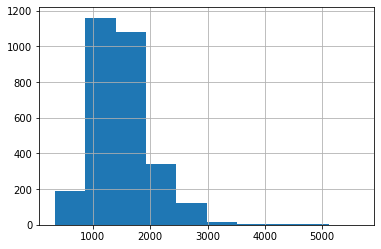

In [7]:
print(df['GrLivArea'].describe())
df['GrLivArea'].hist()
df['Street'].value_counts()

Standardize data to have mean of 0 and standard deviation of 1

In [8]:
df['LotFrontage'] = (df['LotFrontage']-df['LotFrontage'].mean()) / df['LotFrontage'].std()
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,-0.183815,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,0.458974,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,-0.055257,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,-0.398078,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,0.630384,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,0,12,2008,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2915,160,RM,-2.069329,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,0,6,2006,WD,Normal,NaN
2915,2916,160,RM,-2.069329,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,0,4,2006,WD,Abnorml,NaN
2916,2917,20,RL,3.887180,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,0,9,2006,WD,Abnorml,NaN
2917,2918,85,RL,-0.312373,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,MnPrv,Shed,700,7,2006,WD,Normal,NaN


Normalize data so all values are between 0 and 1

In [9]:
df['LotArea'] = df['LotArea']/df['LotArea'].abs().max()
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,-0.183815,0.039258,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,0.458974,0.044600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,-0.055257,0.052266,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,-0.398078,0.044368,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,0.630384,0.066250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,0,12,2008,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2915,160,RM,-2.069329,0.008994,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,0,6,2006,WD,Normal,NaN
2915,2916,160,RM,-2.069329,0.008799,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,0,4,2006,WD,Abnorml,NaN
2916,2917,20,RL,3.887180,0.092917,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,0,9,2006,WD,Abnorml,NaN
2917,2918,85,RL,-0.312373,0.048508,Pave,NaN,Reg,Lvl,AllPub,...,0,0,MnPrv,Shed,700,7,2006,WD,Normal,NaN


Test-Val-Train Split

In [10]:
import numpy as np
train, validate, test = np.split(df.sample(frac=1), [int(.7*len(df)), int(.9*len(df))])
print(f'Train shape: {train.shape}, Val shape: {validate.shape}, Test shape: {test.shape}')

Train shape: (2041, 80), Val shape: (584, 80), Test shape: (292, 80)
